# STAT 201 Project Report (Group 27)

## Exploring the Impact of Relationships on Academic Performance

## Introduction
In the bustling world of academia, students are constantly seeking ways to optimize and maintain their grade point averages (GPAs). As a result, they may face the burning question: **Does a student's relationship status impact their GPA?**

Relationships can often have positive impacts on people's mental and emotional health. This can boost stability and academic support, leading to higher GPAs **(Vaeth, 2009, p.7-8)**. On the other hand, it can also be time consuming and unhealthy, which can detract from a person's studies. This project seeks to answer the question of whether a student's relationship status affects their academic performance.

Our [dataset]( https://www.kaggle.com/datasets/csafrit2/higher-education-students-performance-evaluation) from 2019 contains information on 145 students in the Faculty of Engineering and Faculty of Educational Sciences at the University of California, Irvine. To answer our question, we will infer one parameter - the proportions of students with cumulative GPAs above 3.0 - on the populations of students who are **in or not in relationships.**

## Preliminary Results

In [3]:
# Libraries required for the proposal
suppressPackageStartupMessages({
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse) 
library(tidymodels)
library(datasets)
library(rvest)
library(tibble) 
library(RColorBrewer)
library(httr)
library(ggplot2)})

In [4]:
student_gpa <- read_csv('https://raw.githubusercontent.com/anjx123/stats201-group-project/Project-Report/student_prediction.csv', show_col_types = FALSE)
head(student_gpa) # Read first 6 rows data

STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,⋯,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
STUDENT1,2,2,3,3,1,2,2,1,1,⋯,1,1,3,2,1,2,1,1,1,1
STUDENT2,2,2,3,3,1,2,2,1,1,⋯,1,1,3,2,3,2,2,3,1,1
STUDENT3,2,2,2,3,2,2,2,2,4,⋯,1,1,2,2,1,1,2,2,1,1
STUDENT4,1,1,1,3,1,2,1,2,1,⋯,1,2,3,2,2,1,3,2,1,1
STUDENT5,2,2,1,3,2,2,1,3,1,⋯,2,1,2,2,2,1,2,2,1,1
STUDENT6,2,2,2,3,2,2,2,2,1,⋯,1,1,1,2,1,2,4,4,1,2


                                                Table 1: Loaded Student Information 

### Data Wrangling

Figure 1 (above) shows different variables of the first 6 students from the dataset such as age, gender, and hours spent on studying. We are only interested in the `PARTNER`, `CUML_GPA`, and `EXP_GPA` columns and so we start by selecting those columns.

In [5]:
partner_data <- student_gpa |>
    select(STUDENTID, PARTNER, CUML_GPA) |>
    mutate(PARTNER = recode(PARTNER, '1' = 'Yes', '2' = 'No'))

head(partner_data)

STUDENTID,PARTNER,CUML_GPA
<chr>,<chr>,<dbl>
STUDENT1,No,1
STUDENT2,No,2
STUDENT3,No,2
STUDENT4,Yes,3
STUDENT5,Yes,2
STUDENT6,No,4


                    Table 2: Student Data upon selecting relevant columns for the project

**NOTE:** Column: Cumulative GPA means 'Cumulative grade point average in the last semester'. 1 means the student's cumulative GPA is less than 2.0, (2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49 respectively). 

The code as shown in Figure 3 below shows the counts of students with and without a partner. This will be important to show that we can apply the Central Limit Theorem later. 

In [6]:
partner_data |> summarize(PartnerCount = sum(PARTNER == "Yes"),      # With partner
                          NoPartnerCount = sum(PARTNER == "No"))     # Without partner

PartnerCount,NoPartnerCount
<int>,<int>
61,84


                    Table 3: Count of students with partners and without partners

### Proportion of Students with a Cumulative GPA above 3.0

In this study, we are interested in the proportion of students who have good academic performance. We can then group these students by whether they have a partner or not, and calculate the proportion of individuals that have a cumulative GPA greater than or equal to level 4, (GPA >= 3.00) which we will deem as "successful" in this project.

In [7]:
prop_gpas <- partner_data |>
    group_by(PARTNER) |>
    summarize(count = n(),
              p_gpa_above_3.0 = sum(CUML_GPA >= 4)/count)

    
head(prop_gpas)

PARTNER,count,p_gpa_above_3.0
<chr>,<int>,<dbl>
No,84,0.4404762
Yes,61,0.4590164


            Table 4: Proportion of students' Cumulative GPA above 3.0

According to Table 4, we found that the students with partners have a slightly higher proportion of Cumulative GPA above 3.0 than students without partners. 

### Visualization: Proportion of Students with a Cumulative GPA above 3.0

In order to compare the student's performance with the factor `PARTNER`, we visualize the distribution of the cumulative GPA separately, for students with Partners and without Partners. Figures 1a and 1b show the cumulative GPA for students who have a partner and the culumulative GPA for students who do not have a partner respectively.

Because our sample statistic is the proportion of student GPAs level 4.0 and greater (GPA >= 3.00), we color in the parts we are interested in, inspecting if one group of students has a higher proportion than the other.


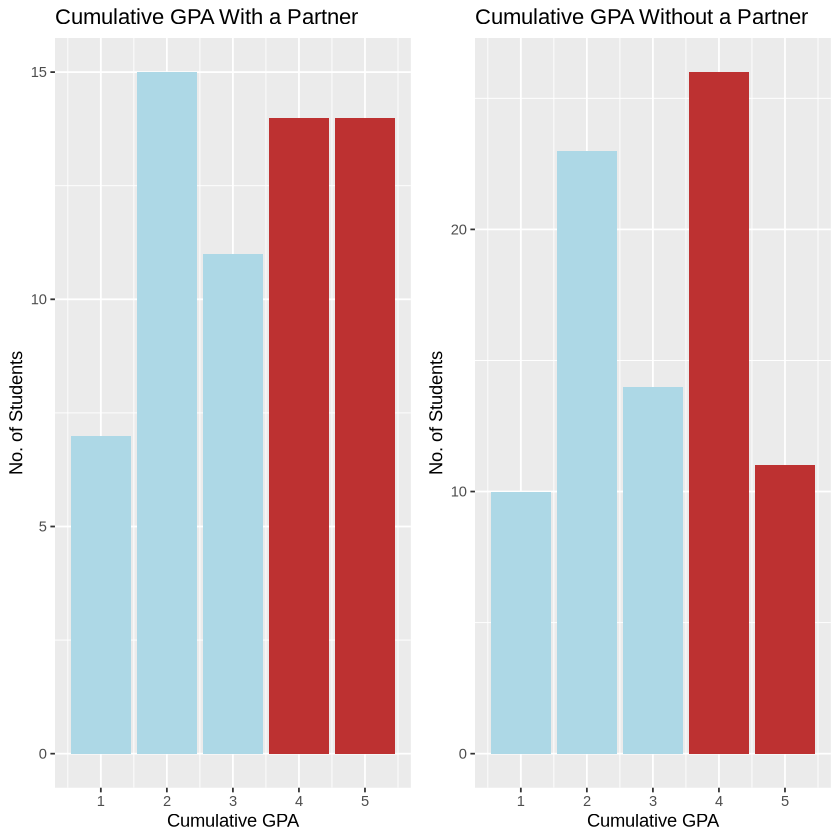

In [8]:
partner_stu_gpa_plot <- partner_data |>
    mutate(bar_color = ifelse(CUML_GPA %in% c(4, 5), "#bd3131", "#ADD8E6")) |>
    filter(PARTNER == "Yes")|>
    ggplot(aes(x = CUML_GPA, fill = bar_color))+
    geom_bar() +
    scale_fill_identity() +
    labs(x = "Cumulative GPA", title = "Cumulative GPA With a Partner", y = "No. of Students")

no_partner_stu_gpa_plot <- partner_data |>
    mutate(bar_color = ifelse(CUML_GPA %in% c(4, 5), "#bd3131", "#ADD8E6")) |>
    filter(PARTNER == "No")|>
    ggplot(aes(x = CUML_GPA, fill = bar_color))+
    geom_bar() +
    scale_fill_identity() +
    labs(x = "Cumulative GPA", title = "Cumulative GPA Without a Partner", y = "No. of Students") #+


plot_grid(partner_stu_gpa_plot, no_partner_stu_gpa_plot)

                            Figure 1a & Figure 1b: Sample Distribution of Cumulative GPA

## Hypothesis Testing via bootstrapping

To start, let us observe the sample statistic with `p1` being the proportion of students who have a partner and have GPA >= 3.0, and `p2` being the proportion of students who do not have a partner and have GPA >= 3.0

In [9]:
df <- tibble(p1 = c(prop_gpas$p_gpa_above_3.0[2]),
             p2 = c(prop_gpas$p_gpa_above_3.0[1])
)
preliminary_diff <- df |> mutate(diff_in_props = p1 - p2)
preliminary_diff

p1,p2,diff_in_props
<dbl>,<dbl>,<dbl>
0.4590164,0.4404762,0.0185402


            Table 5: Difference in Academic Success Proportion between Partnered and Unpartnered Students
            

From our preliminary analysis, we observe a positive difference between the difference in proportions, indicating that students with a partner have a higher mean cumulative GPA in the sample than students who do not. However, with just graphs and tables, we cannot tell how statistically significant this result is, and it may be the result of random error. Thus, we shall conduct a hypothesis test at a confidence level of, $$\alpha = 0.05$$.

Along with the following null and alternate hypothesis:

$$H_0: p_1 - p_2 = 0$$ $$H_1: p_1 - p_2 \neq 0$$

Where once again, p1 is the proportion of students with GPA higher than 3.0 in a relationship; p2 is the proportion of students with GPA higher than 3.0 without a relationship. It is assume that the 2 populations are independent of each other

We start by conducting a hypothesis test using bootstrapping to find an approximation for the sampling distribution. We will use the `infer` package and take 1000 resamples with replacement.

In [10]:
set.seed(100)

tidy_partner_data <- partner_data |>
    mutate(CUML_GPA = recode(CUML_GPA, '1' = 'low',
                             '2' = 'low',
                            '3' = 'low',
                            '4' = 'high',
                            '5' = 'high')) |>
    select(PARTNER,CUML_GPA)

# we find the observed difference in proportion in the sample

obs_diff_prop <- tidy_partner_data |>
    specify(CUML_GPA ~ PARTNER, success = 'high')|>
    calculate(stat = "diff in props", order = c("Yes", "No"))

obs_diff_prop 

# we generate 1000 samples from the null distribution

gpa_null_distribution <- tidy_partner_data |>
    specify(CUML_GPA ~ PARTNER, success = 'high')|>
    hypothesize(null = "independence") |>
    generate(type = "permute", reps = 1000)|>
    calculate(stat = "diff in props", order = c("Yes", "No"))

head(gpa_null_distribution)


stat
<dbl>
0.0185402


replicate,stat
<int>,<dbl>
1,-0.066354411
2,-0.122950820
3,-0.009758002
4,0.018540203
5,-0.009758002
6,0.131733021


        Table 6: Bootstrapping Null Hypothesis Model

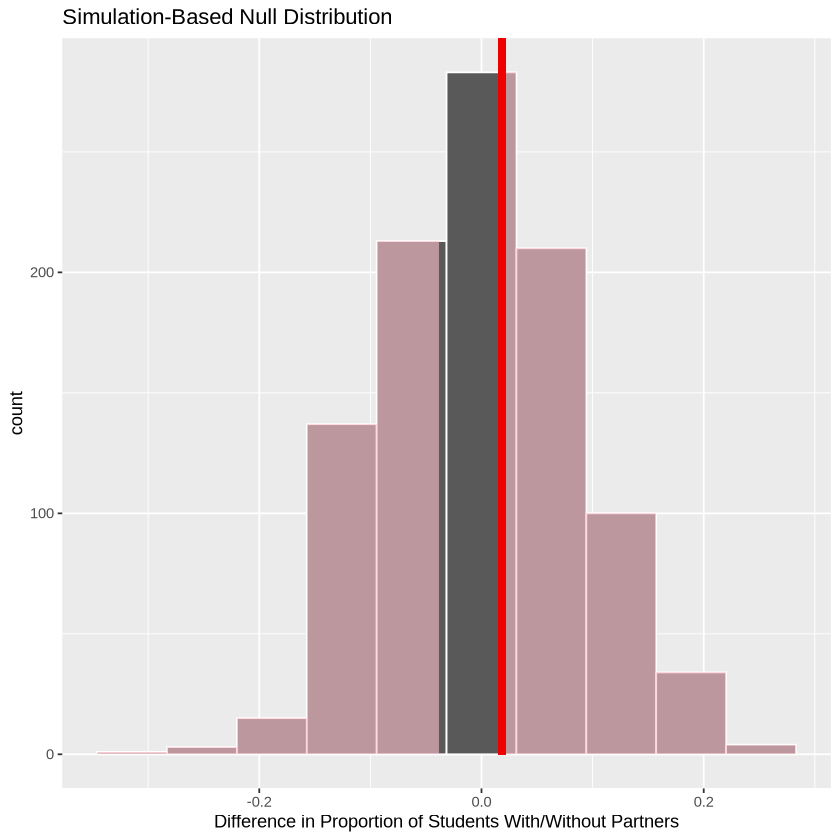

In [11]:
# Visualization for the hypothesis test

gpa_result_plot <- gpa_null_distribution |>
    visualize(bins = 10) +
    shade_p_value(direction = "both", obs_stat = obs_diff_prop)+
    xlab("Difference in Proportion of Students With/Without Partners")

gpa_result_plot

        Figure 2: Result of hypothesis test, based on null hypothesize

In [12]:
# we calculate the p value via bootstrapping

p_value <- gpa_null_distribution |>
    get_p_value(direction = "both", obs_stat = obs_diff_prop)

p_value 

p_value
<dbl>
0.964


        Table 7: P Value for the Bootstrap test

Since the p value is 0.964, and greater than the 5% significance level, we do not reject the null hypothesis at a confidence level of 0.05. Meaning we do not reject the null hypothesis which states that students with relationships have a different proportion of GPA greater than 3.0, that students without a relationship.

Now we can build the 95% confidence interval based on observed statistics.

In [13]:
set.seed(100)

# we generate the bootstrapping based on sample

diff_in_prop_dist <- tidy_partner_data |>
    specify(CUML_GPA ~ PARTNER, success = 'high')|>
    generate(type = "bootstrap", reps = 1000)|>
    calculate(stat = "diff in props", order = c("Yes", "No"))

# Then we generate the confidence level via bootstrapping

diff_in_prop_ci <- diff_in_prop_dist|>
    get_confidence_interval(level = 0.95, type = "percentile")

diff_in_prop_ci

lower_ci,upper_ci
<dbl>,<dbl>
-0.1503896,0.1858905


        Table 8: 95% Confidence Interval for the Bootstrap Model

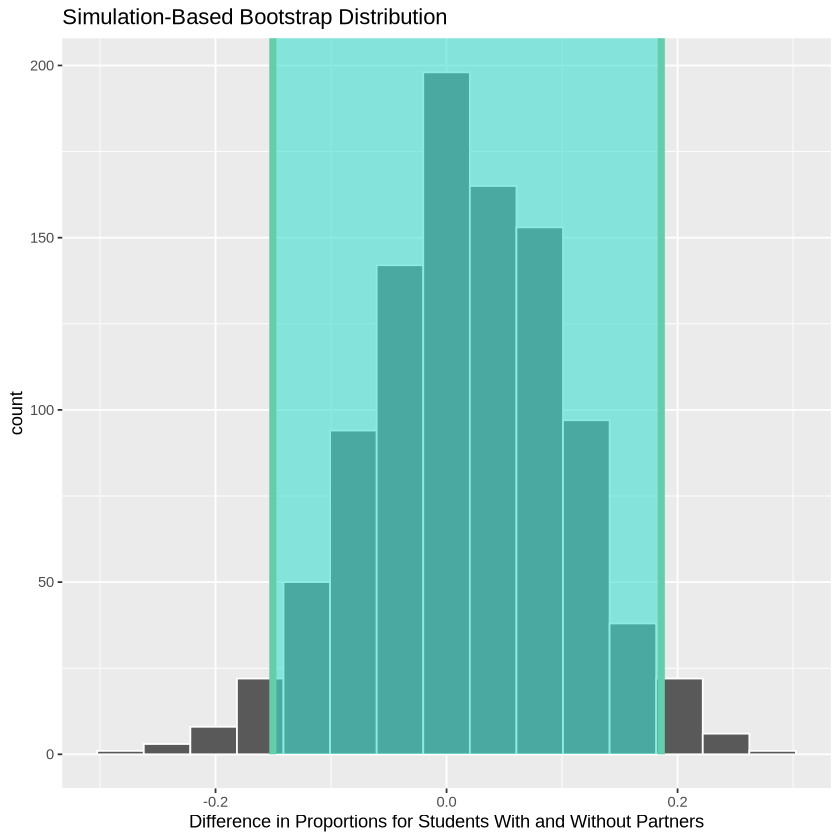

In [14]:
# Visualization of confidence level
diff_in_prop_ci_plot <- diff_in_prop_dist |>
visualize()+
shade_confidence_interval(endpoints = diff_in_prop_ci) +
xlab("Difference in Proportions for Students With and Without Partners")

diff_in_prop_ci_plot

            Figure 3: Bootstrapping distribution with shaded 95% confidence interval

## Asymptotic Analysis

Now let's do an analysis using asympotitc methods. For differences in proportions, the asympototic method is a good approximation for the sampling distribution when $np \ge 10$ and $n(1-p) \ge 10$ for both samples individually.

In [15]:
clt_test <- partner_data |> group_by(PARTNER) |> summarize(count = n(),
                                                           p_gpa_above_3.0 = sum(CUML_GPA >= 4)/count,
                                                          np = count * p_gpa_above_3.0,
                                                          'n(1-p)' = count * (1 - p_gpa_above_3.0)) |> select(PARTNER, np, 'n(1-p)')
clt_test

PARTNER,np,n(1-p)
<chr>,<dbl>,<dbl>
No,37,47
Yes,28,33


        Table 9: Verification of the Application of the CLT

As we can see from table 9, $np \ge 10$ and $n(1-p) \ge 10$ for both samples and thus it would be reasonable to apply the assumptions of the Central Limit Theorem.

To perform the analysis, let us use the `prop.test` function from the `stats` package.

In [85]:
partnered_and_successful <- partner_data |> filter(PARTNER == "Yes" & CUML_GPA >= 4) |> nrow()
total_partnered <- partner_data |> filter(PARTNER == "Yes") |> nrow()


not_partnered_and_successful <- partner_data |> filter(PARTNER == "No" & CUML_GPA >= 4) |> nrow()
total_unpartnered <- partner_data |> filter(PARTNER == "No") |> nrow()

packed_clt <- tidy (
    prop.test (
        x = c(partnered_and_successful, not_partnered_and_successful),
        n = c(total_partnered, total_unpartnered),
        alternative = c("two.sided"),
        conf.level = 0.95    
        ))
packed_clt

estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.4590164,0.4404762,0.002754993,0.9581398,1,-0.1596479,0.1967283,2-sample test for equality of proportions with continuity correction,two.sided


                Table 10: Analysis using prop.test function

The p-value of the analysis is found to be roughly `0.958` which is significantly larger than our significance level of 0.05. Thus, we fail to reject the null hypothesis at a significance level of 0.05. 

## Error Analysis

It is also important and may be interesting to investigate the errors present in our analysis, the code as such:

In [88]:
upper_critical_value <- qnorm(0.975)
lower_critical_value <- qnorm(0.025)

p_hat <- (total_partnered * p1 + total_unpartnered * p2) / (total_partnered + total_unpartnered)
SE <- sqrt(p_hat * (1-p_hat) * (1/total_partnered + 1/total_unpartnered))

upper_error_tail <- pnorm(upper_critical_value, mean = packed_clt$statistic / SE, sd = 1, lower.tail = FALSE)
lower_error_tail <- pnorm(lower_critical_value, mean = packed_clt$statistic / SE, sd = 1, lower.tail = TRUE)


type_II_error <- 1 - upper_error_tail - lower_error_tail

power <- 1 - type_II_error 

error_analysis <- tibble(type_I_error = 0.05, type_II_error = type_II_error, power = power)
error_analysis

type_I_error,type_II_error,power
<dbl>,<dbl>,<dbl>
0.05,0.9498758,0.05012423


                Table 11: Error Analysis Table

In table 11, the type I error is equal to our significance level. Thus our probability of committing a type I error and falsely rejecting the null hypothesis is 5%. In this analysis, it would mean falsely coming to the conclusion that a student's relationship status affects their GPA when it actually doesn't.

The type II error of our analysis is large, at 95.0%. This is due to our low effect size and could be reduced if we had a larger sample size. Thus our probability of commiting a type II error and falsely not rejecting the null hypothesis when we should is high. In this analysis, it would mean not rejecting the null hypothesis when relationships may actually have an impact on GPA.

As our type II is large, our power is very small, meaning our test only has a small chance of detecting if relationships having an impact on GPA when it actually exists. Perhaps in future tests, to increase our power, we should increase our sample size, and increase our significance level to have a higher probability of aoviding type II error. 

## Hypothesis Test Visualization

Perhaps it may be helpful to visualize why exactly our test's power is so low, and to better contextualise the high p-value of `0.958` that resulted from our hypothesis test. From our analysis so far, we should expect to see a low effect size, with a lot of overlap between our null and alternate hypothesis curves.

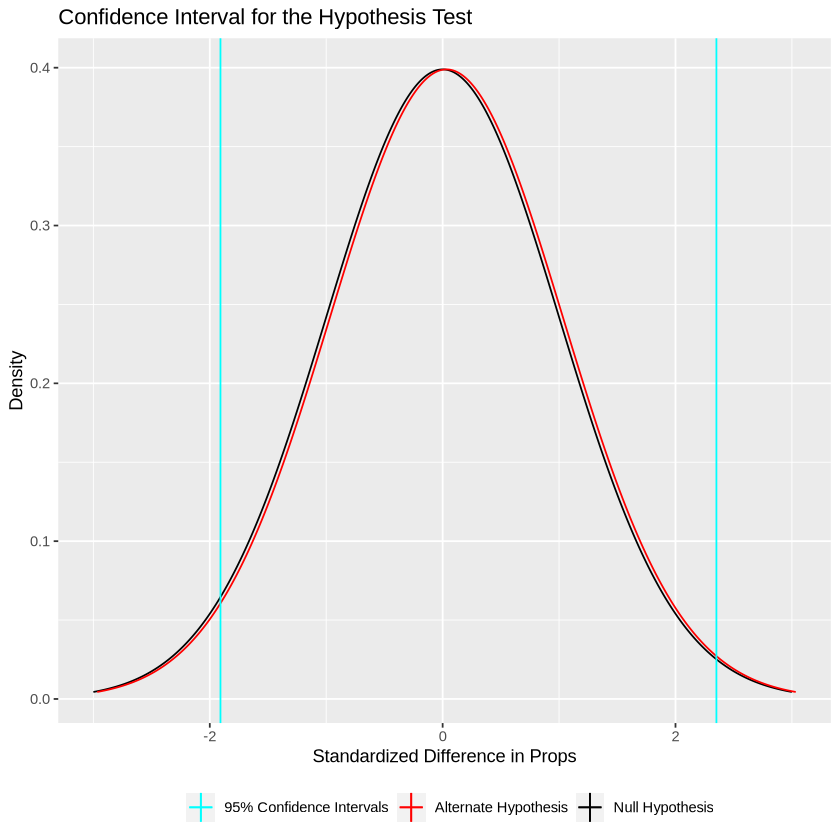

In [91]:
p1 <- packed_clt$estimate1     ## Prop With partner
p2 <- packed_clt$estimate2     ## Prop without partner

p_hat <- (total_partnered * p1 + total_unpartnered * p2) / (total_partnered + total_unpartnered)
SE <- sqrt(p_hat * (1-p_hat) * (1/total_partnered + 1/total_unpartnered))

alt_offset <- packed_clt$statistic / SE

upper_critical_value <- qnorm(0.975)
lower_critical_value <- qnorm(0.025)
plot_range <- tibble(lower = -3, upper = 3)
null_model <- tibble(z = seq(from = plot_range$lower, to = plot_range$upper, by = 0.01), density = dnorm(z))
alternative_model <- null_model |> mutate(z = z + alt_offset)

ci_plot <- ggplot() +
    geom_line(data = null_model, aes(x = z, y = density, color = "Null Hypothesis")) +
    geom_line(data = alternative_model, aes(x = z, y = density, color = "Alternate Hypothesis")) +
    geom_vline(aes(xintercept = (packed_clt$conf.low / SE), color = '95% Confidence Intervals')) +
    geom_vline(aes(xintercept = (packed_clt$conf.high / SE), color = '95% Confidence Intervals')) +
    scale_color_manual(values = c("95% Confidence Intervals" = "#00ffff", "Null Hypothesis" = "black", "Alternate Hypothesis" = "red")) +
    ggtitle("Confidence Interval for the Hypothesis Test") +
    xlab("Standardized Difference in Props") +
    theme(legend.title = element_blank())+
    theme(legend.position = "bottom") +
    ylab("Density") 
            
ci_plot



# p1 <- packed_clt$estimate1     ## Prop With partner
# p2 <- packed_clt$estimate2     ## Prop without partner
# se1 <- sqrt(p1 * (1 - p1) / total_partnered)
# se2 <- sqrt(p2 * (1 - p2) / total_unpartnered)

# # Generate a sequence of x-values
# x <- seq(0, 1, length=100)

# # Calculate the densities
# y1 <- dnorm(x, mean=p1, sd=se1)
# y2 <- dnorm(x, mean=p2, sd=se2)

# # Combine the data
# data4 <- data.frame(x = c(x, x), 
#                    y = c(y1, y2), 
#                    group = rep(c("Partner (in a relationship) ", "Without Partner (No Relationship)"), each = length(x)))
                

# # Create the plot
# n1_curve <- ggplot(data4, aes(x=x, y=y, color=group)) +
#           geom_line() +
#          ggtitle("Difference in Proportions Normal Curve") +
#      theme(text = element_text(size = 12)) 
        
            
# n1_curve

                    Figure 4: Hypothesis Test With Asympotitcs Visualization 

From figure 4, we can see that our predictions were correct, the visual difference between our Null Hypothesis and Alternate Hypothesis is barely noticeable.

# Methods & Results
This report is trustworthy as it uses robust statistical frameworks to analyze the data. The hypothesis testing approach which includes bootstrapping to obtain confidence intervals ensures that the conclusions drawn are statistically significant and not due to random chance. In addition, the report uses data collected by a reputable source UCI's Faculty of Engineering and Faculty of Educational Sciences students which gives credit that the sample was taken without bias and representative of the population.

From our preliminary analysis, we see that students with a partner have a higher mean cumulative GPA in the sample than students who do not. However, this would not be sufficient evidence to provide to a stakeholder and declare that having a partner is better for student's GPA. This is because plots do not tell us whether the observed differences are statistically significant as they do not provide a confidence interval to show us how precise our estimates are. Therefore, there’s a risk of drawing inaccurate conclusions due to the inherent randomness of sampling. 

Bootstrapping is a method which makes fewer assumptions about the underlying population distribution. It's useful when sample size is small, or when the populaiton may not follow a normal distribution. Nonetheless, this requires a longer computational time, especially when it's a large datasets. 

From Table 8 and Table 10, both bootstrapping and asymptotic methods produce quite similar results. This is due to the conditions for the Central Limit Theorem of sample size $n\geq 30$, and $np \ge 10$ and $n(1-p) \ge 10$. The sample size is good enough for asymptotic methods to provide a good approximation. The Asymptotic methods are generally faster and less computationally intensive than bootstrapping. 

In this case, asymptotic methods are **more trustworthy** over bootstrapping since the conditions for CLT are met. 


### Our plan moving forward
To address these gaps, we will conduct a hypothesis test using the infer package. The framework will be roughly as such
```r  
dataset |> specify |> hypothesize_with_independence |> generate_using_permute |> calculate_the_diff_in_mean |> get_ci |> Graph the bootstrap distribution and confidence interval
``` 
Then we will use `
get_p_value()
`
with direction set to both sides to get the p_value and compare it to a chosen significance level to see whether we should reject the null hypothesis. 

Bootstrapping to obtain the confidence interval (CI) results in fewer assumptions on the data and can be simply obtained by using `get_ci` in the infer package. 
Asymptotics relies on the Central Limit Theorem (CLT) which relies on having a sufficiently sized data set that is not heavily skewed. In this case, It would be alright to use the asymptotic method as the dataset is sufficiently large (counts 84 for no partner and 64 for yes partner), and the difference in mean being a sum of values from the population. 

### Discussions


From the results and plots as obtained in Table 10 and Figure 4 respectively, the blue curve shows the distribution of proportion of students **who have a partner whose GPA are higher than 3.0** (p1). The red curve shows the distribution of proportion of students who **do not have a partner whose GPA are higher than 3.0** (p2). The peak of each curve represents the most likely value of the proportion for each different groups. The width of the curve shows the variability in the estimate of the proportion. A wider curve shows that there's a higher variability

Figure 4 shows the blue curve is wider when compared to the red curve. This shows that there's more variability in proportion of students **with** a partner whose GPA are higher than 3.0, and this is determined through the sample standard deviation of the data. Since the `p-value` as obtained in Table 10 is `0.958` and `0.964` as obtained in Table 7, which shows the p-value is significantly greater than $\alpha = 0.05$. Hence, we do not reject the null hypothesis. This shows that the data does not have strong evidence to conclude the proportion of students with GPA higher than 3.0 **is different** between those who are not on relationship and those who are in a relationship. Figure 4 visually supports the conclusion.

From the data and analysis as obtained above, there are **strong evidences** to suggest that dating in university **does not affect students in attaining high GPA.** **(Vaeth, 2009, p.7-8)**. The data and analysis suggests that having a relationship in university seems to lead individuals attaining high GPA. This **complements** with our expected findings that we had hoped to obtained as mentioned in the proposal earlier that there's a correlation between being in a relationship and an individual GPA since students in relationships may have more academic, emotional support to boost mental health and stability leading to higher GPAs.

#### Future Questions

Some possible future questions of the study could lead to: 
1. Are there other factors (e.g., major, extracurricular activities, work status) that might affect the proportion of students with a GPA higher than 3.0?
2. Can we predict a student’s GPA based on their relationship status and other factors?
3. Is there a significant difference in the proportion of students with a GPA higher than 3.0 between male and female students?

### What we expect to find

We expect to find that there will be a correlation between being in a relationship and a student's GPA as students in relationships may have more academic, emotional support that could boost mental health and stability leading to higher GPAs **(Vaeth, 2009, p.7-8)**. This is especially when relationship are steady, consequently relationships can be a distraction from studies and lead to a lower GPA when it is unhealthy. 

### Impact
The implications of our study extend beyond statistical correlations, offering valuable insights for students, educational institutions, and policymakers. The findings serve as a guide for students contemplating or navigating relationships during their academic journey. Understanding the relationship dynamics and their potential influence on academic performance empowers students to make informed decisions tailored to their individual needs and goals.

Educational institutions can leverage these findings to develop targeted strategies aimed at fostering a supportive academic environment. Initiatives such as relationship counseling services or workshops on achieving a balance between personal life and academic responsibilities can be implemented to address the diverse needs of students. By recognizing the potential impact of relationships on GPA, schools can proactively support students in managing their academic and personal lives effectively.

Drawing inspiration from the work of **Lin S. Norton, S. Thomas, K. Morgan, A. Tilley, and Thomas E. Dickins (1998)**, our study contributes to the ongoing discourse on the intersection of relationships and academic pursuits. As the academic landscape evolves, the proactive integration of relationship-focused support services aligns with a holistic approach to student well-being, fostering an environment conducive to both personal and academic growth.

In essence, the impact of our research extends beyond statistical analysis, offering practical applications that can enhance the overall student experience and contribute to the development of student-centric support systems within educational institutions.







### Further Questions
What specific aspects of a relationship affect a student's GPA? Is it the emotional support, the time commitment, or some other factor? Perhaps we can also explore how different types of relationships (short-term, long-term etc.) have an effect on GPA.

## References
1. Csafrit. (2021, December 21). Higher Education Students Performance Evaluation. Kaggle. https://www.kaggle.com/datasets/csafrit2/higher-education-students-performance-evaluation 

2. Norton, L. S., Thomas, S., Morgan, K., Tilley, A., &amp; Dickins, T. E. (1998). Full-time studying and long-term relationships: Make or break for mature students? British Journal of Guidance &amp;amp; Counselling, 26(1), 75–88. https://doi.org/10.1080/03069889808253840 

3. Vaeth , J. (2009). Undergraduate Psychology Research Methods Journal - Lindenwood University. https://digitalcommons.lindenwood.edu/cgi/viewcontent.cgi?article=1140&amp;context=psych_journals 

4. Honghao, J., Po, Y., & Tianyu, Y. (2021). The influence of adolescents’ romantic relationship on individual development: Evidence from China. International Journal of Chinese Education, 10(3).
https://link.springer.com/article/10.1007/s10964-021-01395-2